<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [88]:
# Importation de la librairie Pandas
import pandas as pd

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [89]:
#Importation du fichier population.csv
population = pd.read_csv("data/population.csv")

#Importation du fichier dispo_alimentaire.csv
dispo = pd.read_csv("data/dispo_alimentaire.csv")

#Importation du fichier aide_alimentaire.csv
aide = pd.read_csv("data/aide_alimentaire.csv")

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv("data/sous_nutrition.csv")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [90]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [91]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

# Informations sur le fichier population.csv
print("\nPopulation :")
print(population.info())
print(population.describe())

# Informations sur dispo_alimentaire.csv
print("\nDisponibilité alimentaire :")
print(dispo.info())
print(dispo.describe())

# Informations sur aide_alimentaire.csv
print("\nAide alimentaire :")
print(aide.info())
print(aide.describe())

# Informations sur sous_nutrition.csv
print("\nSous-nutrition :")
print(sous_nutrition.info())
print(sous_nutrition.describe())


Population :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
None
       Année    Valeur
count  1,416     1,416
mean   2,016    31,448
std        2   130,081
min    2,013         1
25%    2,014       378
50%    2,016     5,126
75%    2,017    19,307
max    2,018 1,427,648

Disponibilité alimentaire :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   P

In [92]:
#Affichage les 5 premières lignes de la table

# Affichage du fichier population.csv
print("Population :")
display(population.head())

# Affichage du fichier dispo_alimentaire.csv
print("Disponibilité alimentaire :")
display(dispo.head())

# Affichage du fichier aide_alimentaire.csv
print("Aide alimentaire :")
display(aide.head())

# Affichage du fichier sous_nutrition.csv
print("Sous-nutrition :")
display(sous_nutrition.head())

Population :


,Zone,Année,Valeur
0,Afghanistan,2013,"32,270"
1,Afghanistan,2014,"33,371"
2,Afghanistan,2015,"34,414"
3,Afghanistan,2016,"35,383"
4,Afghanistan,2017,"36,296"


Disponibilité alimentaire :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5,2,0,1,53,NaN,NaN,53,NaN,53,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1,1,0,0,41,2,40,39,2,3,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1,0,0,0,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4,3,0,0,82,NaN,82,82,NaN,NaN,NaN,NaN,NaN


Aide alimentaire :


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


Sous-nutrition :


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [93]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000

# Multiplication de la colonne valeur par 1000
population["Valeur"] = population["Valeur"] * 1000
display(population.head())

,Zone,Année,Valeur
0,Afghanistan,2013,"32,269,589"
1,Afghanistan,2014,"33,370,794"
2,Afghanistan,2015,"34,413,603"
3,Afghanistan,2016,"35,383,032"
4,Afghanistan,2017,"36,296,113"


In [94]:
#Changement du nom de la colonne Valeur par Population
population = population.rename(columns={"Valeur": "Population"})

In [95]:
#Affichage les 5 premières lignes de la table pour voir les modifications
display(population.head())

,Zone,Année,Population
0,Afghanistan,2013,"32,269,589"
1,Afghanistan,2014,"33,370,794"
2,Afghanistan,2015,"34,413,603"
3,Afghanistan,2016,"35,383,032"
4,Afghanistan,2017,"36,296,113"


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [96]:
#Afficher les dimensions du dataset
print("Dimensions du dataset :", dispo.shape)

Dimensions du dataset : (15605, 18)


In [97]:
#Consulter le nombre de colonnes
print("\nInfos sur les colonnes :")
print(dispo.info())


Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse 

In [98]:
#Affichage les 5 premières lignes de la table
print("\nAperçu du dataset :")
display(dispo.head())


Aperçu du dataset :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5,2,0,1,53,NaN,NaN,53,NaN,53,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1,1,0,0,41,2,40,39,2,3,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1,0,0,0,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4,3,0,0,82,NaN,82,82,NaN,NaN,NaN,NaN,NaN


In [99]:
#Remplacement des NaN dans le dataset par des 0
dispo = dispo.fillna(0)
print("\nAprès remplacement des NaN par 0 :")
display(dispo.head())


Après remplacement des NaN par 0 :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0,0,5,2,0,1,53,0,0,53,0,53,0,0,0
1,Afghanistan,"Agrumes, Autres",vegetale,0,0,1,1,0,0,41,2,40,39,2,3,0,0,0
2,Afghanistan,Aliments pour enfants,vegetale,0,0,1,0,0,0,2,0,2,2,0,0,0,0,0
3,Afghanistan,Ananas,vegetale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,Bananes,vegetale,0,0,4,3,0,0,82,0,82,82,0,0,0,0,0


In [100]:
#Multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes_tonnes = [
    "Disponibilité intérieure",
    "Aliments pour animaux",
    "Semences",
    "Pertes",
    "Transformations",
    "Exportations",
    "Nourriture",
    "Autres utilisations"
]

for col in colonnes_tonnes:
    if col in dispo.columns:
        dispo[col] = dispo[col] * 1000

In [101]:
#Affichage les 5 premières lignes de la table
print("\nDataset après conversion en kg :")
display(dispo.head())


Dataset après conversion en kg :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0,0,5,2,0,1,"53,000",0,0,"53,000",0,53,0,0,0
1,Afghanistan,"Agrumes, Autres",vegetale,0,0,1,1,0,0,"41,000",2,40,"39,000","2,000",3,0,0,0
2,Afghanistan,Aliments pour enfants,vegetale,0,0,1,0,0,0,"2,000",0,2,"2,000",0,0,0,0,0
3,Afghanistan,Ananas,vegetale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,Bananes,vegetale,0,0,4,3,0,0,"82,000",0,82,"82,000",0,0,0,0,0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [102]:
#Afficher les dimensions du dataset
print("Dimensions du dataset :", aide.shape)

Dimensions du dataset : (1475, 4)


In [103]:
#Consulter le nombre de colonnes
print("\nInfos sur les colonnes :")
print(aide.info())


Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB
None


In [104]:
#Affichage les 5 premières lignes de la table
print("\nInfos sur les colonnes :")
print(aide.head())


Infos sur les colonnes :
  Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504


In [105]:
#Changement du nom de la colonne Pays bénéficiaire par Zone
aide = aide.rename(columns={"Pays bénéficiaire": "Zone"})
# Vérification
print(aide.head())

          Zone  Année              Produit  Valeur
0  Afghanistan   2013  Autres non-céréales     682
1  Afghanistan   2014  Autres non-céréales     335
2  Afghanistan   2013         Blé et Farin   39224
3  Afghanistan   2014         Blé et Farin   15160
4  Afghanistan   2013             Céréales   40504


In [106]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide["Valeur"] = aide["Valeur"] * 1000

In [107]:
#Affichage les 5 premières lignes de la table
display(aide.head())

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [108]:
#Afficher les dimensions du dataset
print("Dimensions du dataset :", sous_nutrition.shape)

Dimensions du dataset : (1218, 3)


In [109]:
#Consulter le nombre de colonnes
print("\nInfos sur les colonnes :")
print(sous_nutrition.info())


Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB
None


In [110]:
#Afficher les 5 premières lignes de la table
print("\nInfos sur les colonnes :")
print(sous_nutrition.info())


Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB
None


In [111]:
#Conversion de la colonne sous nutrition en numérique

# Remplacer la chaîne "<0.1>" par "0.1"
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace("<0.1", "0.1")

# Conversion en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

# Vérification
print(sous_nutrition['Valeur'].unique()[:20])


[ 8.6  8.8  8.9  9.7 10.5 11.1  2.2  2.5  2.8  3.   3.1  3.3  0.1  1.3
  1.2  nan  7.6  6.2  5.3  5.6]


In [112]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0

# Conversion de la colonne Valeur en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

# Remplacement des NaN par 0
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)

# Vérification
display(sous_nutrition.head())


,Zone,Année,Valeur
0,Afghanistan,2012-2014,9
1,Afghanistan,2013-2015,9
2,Afghanistan,2014-2016,9
3,Afghanistan,2015-2017,10
4,Afghanistan,2016-2018,10


In [113]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition =sous_nutrition.rename(columns={"Valeur": "sous_nutrition"})

In [114]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"] * 1000

In [115]:
#Afficher les 5 premières lignes de la table
display(sous_nutrition.head())

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,"8,600"
1,Afghanistan,2013-2015,"8,800"
2,Afghanistan,2014-2016,"8,900"
3,Afghanistan,2015-2017,"9,700"
4,Afghanistan,2016-2018,"10,500"


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [116]:
#Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

# Filtrer population 2017
popu_2017 = population[population["Année"] == 2017]

# Filtrer sous_nutrition sur la période 2016-2018 (qui couvre 2017)
sn_2017 = sous_nutrition[sous_nutrition["Année"] == "2016-2018"]

# Merge sur la colonne Zone
popu_nutri = pd.merge(sn_2017, popu_2017, on="Zone", how="inner")

In [117]:
#Affichage du dataset
display(popu_nutri.head(20))

,Zone,Année_x,sous_nutrition,Année_y,Population
0,Afghanistan,2016-2018,"10,500",2017,"36,296,113"
1,Afrique du Sud,2016-2018,"3,100",2017,"57,009,756"
2,Albanie,2016-2018,100,2017,"2,884,169"
3,Algérie,2016-2018,"1,300",2017,"41,389,189"
4,Allemagne,2016-2018,0,2017,"82,658,409"
5,Andorre,2016-2018,0,2017,"77,001"
6,Angola,2016-2018,"5,800",2017,"29,816,766"
7,Antigua-et-Barbuda,2016-2018,0,2017,"95,426"
8,Arabie saoudite,2016-2018,"1,600",2017,"33,101,179"
9,Argentine,2016-2018,"1,500",2017,"43,937,140"


In [118]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

# Réorganisation des colonnes et renommage
popu_nutri = popu_nutri[["Zone", "Année_y", "Population", "sous_nutrition"]].rename(columns={"Année_y": "Année"})

# Calcul de la proportion par pays
popu_nutri["Proportion_sous_nutrition"] = (popu_nutri["sous_nutrition"] / popu_nutri["Population"]) * 100

# Calcul de la proportion mondiale
prop_mondiale = popu_nutri["sous_nutrition"].sum() / popu_nutri["Population"].sum() * 100

# Affichage du résultat
print("Proportion mondiale de sous-nutrition en 2017 : {:.2f}%".format(prop_mondiale))
display(popu_nutri.head(20))

Proportion mondiale de sous-nutrition en 2017 : 0.01%


,Zone,Année,Population,sous_nutrition,Proportion_sous_nutrition
0,Afghanistan,2017,"36,296,113","10,500",0
1,Afrique du Sud,2017,"57,009,756","3,100",0
2,Albanie,2017,"2,884,169",100,0
3,Algérie,2017,"41,389,189","1,300",0
4,Allemagne,2017,"82,658,409",0,0
5,Andorre,2017,"77,001",0,0
6,Angola,2017,"29,816,766","5,800",0
7,Antigua-et-Barbuda,2017,"95,426",0,0
8,Arabie saoudite,2017,"33,101,179","1,600",0
9,Argentine,2017,"43,937,140","1,500",0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [119]:
#Combien mange en moyenne un être humain ? Source => FAO ≈ 2500 kcal/jour
besoin_kcal = 2500

In [120]:
#On commence par faire une jointure entre le data frame population et dispo_alimentaire afin d'ajouter dans ce dernier la population

# Filtrer la population pour 2017
popu_2017 = population[population["Année"] == 2017]

# Faire la jointure
dispo_pop = pd.merge(dispo, popu_2017, on="Zone", how="inner")


In [121]:
#Affichage du nouveau dataframe
display(dispo_pop.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0,0,5,2,0,1,"53,000",0,0,"53,000",0,53,0,0,0,2017,"36,296,113"
1,Afghanistan,"Agrumes, Autres",vegetale,0,0,1,1,0,0,"41,000",2,40,"39,000","2,000",3,0,0,0,2017,"36,296,113"
2,Afghanistan,Aliments pour enfants,vegetale,0,0,1,0,0,0,"2,000",0,2,"2,000",0,0,0,0,0,2017,"36,296,113"
3,Afghanistan,Ananas,vegetale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,"36,296,113"
4,Afghanistan,Bananes,vegetale,0,0,4,3,0,0,"82,000",0,82,"82,000",0,0,0,0,0,2017,"36,296,113"


In [122]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_pop["dispo_kcal"] = dispo_pop["Disponibilité alimentaire (Kcal/personne/jour)"] * dispo_pop["Population"] * 365

# Somme mondiale
total_kcal = dispo_pop["dispo_kcal"].sum()
print("Total des kcal disponibles mondialement en 2017 :", total_kcal)

Total des kcal disponibles mondialement en 2017 : 7635429388975815.0


In [123]:
#Calcul du nombre d'humains pouvant être nourris
nb_humains_nourris = total_kcal / (besoin_kcal * 365)  # sur une année
print("Nombre théorique d'humains pouvant être nourris en 2017 :", int(nb_humains_nourris))

Nombre théorique d'humains pouvant être nourris en 2017 : 8367593850


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [124]:
# Transfert des données avec les végétaux dans un nouveau dataframe
pd.set_option('display.float_format', '{:,.0f}'.format)

dispo_vegetaux = dispo_pop[dispo_pop["Origine"] == "vegetale"]
display(dispo_vegetaux.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0,0,1,1,0,0,"41,000",...,40,"39,000","2,000",3,0,0,0,2017,"36,296,113","13,248,081,245"
2,Afghanistan,Aliments pour enfants,vegetale,0,0,1,0,0,0,"2,000",...,2,"2,000",0,0,0,0,0,2017,"36,296,113","13,248,081,245"
3,Afghanistan,Ananas,vegetale,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017,"36,296,113",0
4,Afghanistan,Bananes,vegetale,0,0,4,3,0,0,"82,000",...,82,"82,000",0,0,0,0,0,2017,"36,296,113","52,992,324,980"
6,Afghanistan,Bière,vegetale,0,0,0,0,0,0,"3,000",...,3,"3,000",0,0,0,0,0,2017,"36,296,113",0


In [125]:
# Calcul du nombre de kcal disponible pour les végétaux
dispo_vegetaux = dispo_pop[dispo_pop["Origine"] == "vegetale"].copy()

dispo_vegetaux["dispo_kcal_veg"] = (
    dispo_vegetaux["Disponibilité alimentaire (Kcal/personne/jour)"]
    * dispo_vegetaux["Population"]
    * 365
)

# Somme mondiale
total_kcal_veg = dispo_vegetaux["dispo_kcal_veg"].sum()
print("Total des kcal disponibles provenant des produits végétaux en 2017 :", total_kcal_veg)

Total des kcal disponibles provenant des produits végétaux en 2017 : 6300178937197865.0


In [126]:
# Calcul du nombre d'humains pouvant être nourris avec les végétaux
nb_humains_veg = total_kcal_veg / (besoin_kcal * 365)
print("Nombre théorique d'humains pouvant être nourris avec les produits végétaux en 2017 :", int(nb_humains_veg))


Nombre théorique d'humains pouvant être nourris avec les produits végétaux en 2017 : 6904305684


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [127]:
# Calcul de la disponibilité totale mondiale (somme de la colonne 'Disponibilité intérieure - Quantité')
dispo_totale = dispo_pop["Disponibilité intérieure"].sum()
print("Disponibilité intérieure totale mondiale :", dispo_totale)

Disponibilité intérieure totale mondiale : 9733927000.0


In [128]:
# Création d'une boucle pour afficher les différentes utilisations de la disponibilité intérieure
colonnes_utilisation = [
    "Aliments pour animaux",
    "Pertes",
    "Nourriture",
    "Semences",
    "Traitement",
    "Autres Utilisations"
]

for col in colonnes_utilisation:
    utilisation = dispo_pop[col].sum()
    pourcentage = (utilisation / dispo_totale) * 100
    print(f"{col} : {utilisation:.2f} tonnes, soit {pourcentage:.2f}% de la disponibilité totale")

Aliments pour animaux : 1288002000.00 tonnes, soit 13.23% de la disponibilité totale
Pertes : 452283000.00 tonnes, soit 4.65% de la disponibilité totale
Nourriture : 4805525000.00 tonnes, soit 49.37% de la disponibilité totale
Semences : 153317000.00 tonnes, soit 1.58% de la disponibilité totale
Traitement : 2185641.00 tonnes, soit 0.02% de la disponibilité totale
Autres Utilisations : 858771.00 tonnes, soit 0.01% de la disponibilité totale


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [129]:
#Création d'une liste avec toutes les variables
# Liste manuelle des produits céréaliers
liste_cereales = [
    "Blé", "Riz (Eq Blanchi)", "Maïs", "Orge", "Seigle",
    "Avoine", "Sorgho", "Millet", "Céréales, Autres"
]

# Filtrage du DataFrame sur cette liste
cereales = dispo_pop[dispo_pop["Produit"].isin(liste_cereales)].copy()
pd.set_option('display.float_format', '{:,.0f}'.format)

display(cereales.head())


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
7,Afghanistan,Blé,vegetale,0,0,"1,369",160,5,37,"5,992,000",...,"1,173","4,895,000","775,000","5,169","322,000",0,-350,2017,"36,296,113","18,136,623,224,405"
12,Afghanistan,"Céréales, Autres",vegetale,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017,"36,296,113",0
32,Afghanistan,Maïs,vegetale,"200,000",0,21,2,0,1,"313,000",...,1,"76,000","31,000",312,"5,000",0,0,2017,"36,296,113","278,209,706,145"
34,Afghanistan,Millet,vegetale,0,0,3,0,0,0,"13,000",...,0,"12,000","1,000",13,0,0,0,2017,"36,296,113","39,744,243,735"
40,Afghanistan,Orge,vegetale,"360,000",0,26,3,0,1,"524,000",...,10,"89,000","52,000",514,"22,000",0,0,2017,"36,296,113","344,450,112,370"


In [130]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
liste_cereales = [
    "Blé", "Riz (Eq Blanchi)", "Maïs", "Orge", "Seigle",
    "Avoine", "Sorgho", "Millet", "Céréales, Autres"
]

cereales = dispo_pop[dispo_pop["Produit"].isin(liste_cereales)].copy()

In [131]:
#Affichage de la proportion d'alimentation animale
display(cereales.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
7,Afghanistan,Blé,vegetale,0,0,"1,369",160,5,37,"5,992,000",...,"1,173","4,895,000","775,000","5,169","322,000",0,-350,2017,"36,296,113","18,136,623,224,405"
12,Afghanistan,"Céréales, Autres",vegetale,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017,"36,296,113",0
32,Afghanistan,Maïs,vegetale,"200,000",0,21,2,0,1,"313,000",...,1,"76,000","31,000",312,"5,000",0,0,2017,"36,296,113","278,209,706,145"
34,Afghanistan,Millet,vegetale,0,0,3,0,0,0,"13,000",...,0,"12,000","1,000",13,0,0,0,2017,"36,296,113","39,744,243,735"
40,Afghanistan,Orge,vegetale,"360,000",0,26,3,0,1,"524,000",...,10,"89,000","52,000",514,"22,000",0,0,2017,"36,296,113","344,450,112,370"


In [132]:
#Affichage de la proportion d'alimentation animale

# Somme de la disponibilité intérieure totale pour les céréales
total_cereales = cereales["Disponibilité intérieure"].sum()

# Somme de la quantité utilisée pour les animaux
alim_animale = cereales["Aliments pour animaux"].sum()

# Calcul du pourcentage
proportion_animaux = (alim_animale / total_cereales) * 100

print(f"Proportion des céréales utilisées pour l'alimentation animale : {proportion_animaux:.2f}%")


Proportion des céréales utilisées pour l'alimentation animale : 36.14%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [133]:
#Création de la colonne proportion par pays
# On exclut les pays où la sous-nutrition est égale à 0 (aucune donnée ou pas de famine)
pays_sous_nutris = popu_nutri[popu_nutri["sous_nutrition"] > 0].copy()

# Calcul de la proportion (%) de personnes sous-alimentées
# Les valeurs de "sous_nutrition" sont exprimées en millions de personnes selon la FAO
pays_sous_nutris["Proportion_sous_nutrition"] = (
    pays_sous_nutris["sous_nutrition"] / (pays_sous_nutris["Population"] / 1_000_000)
) * 100

# Vérification rapide sur quelques pays
display(pays_sous_nutris[["Zone", "Population", "sous_nutrition", "Proportion_sous_nutrition"]].head(10))

,Zone,Population,sous_nutrition,Proportion_sous_nutrition
0,Afghanistan,"36,296,113","10,500","28,929"
1,Afrique du Sud,"57,009,756","3,100","5,438"
2,Albanie,"2,884,169",100,"3,467"
3,Algérie,"41,389,189","1,300","3,141"
6,Angola,"29,816,766","5,800","19,452"
8,Arabie saoudite,"33,101,179","1,600","4,834"
9,Argentine,"43,937,140","1,500","3,414"
10,Arménie,"2,944,791",100,"3,396"
16,Bangladesh,"159,685,424","21,500","13,464"
17,Barbade,"286,232",100,"34,937"


In [134]:
#affichage après trie des 10 pires pays
# Tri décroissant par proportion de sous-nutrition
pays_pires = pays_sous_nutris.sort_values(by="Proportion_sous_nutrition", ascending=False)

# Affichage des 10 pays les plus touchés
display(pays_pires.head(10))

,Zone,Année,Population,sous_nutrition,Proportion_sous_nutrition
51,Dominique,2017,"71,458",100,"139,942"
164,Saint-Vincent-et-les Grenadines,2017,"109,827",100,"91,052"
98,Kiribati,2017,"114,158",100,"87,598"
167,Sao Tomé-et-Principe,2017,"207,089",100,"48,288"
78,Haïti,2017,"10,982,366","5,300","48,259"
157,République populaire démocratique de Corée,2017,"25,429,825","12,000","47,189"
108,Madagascar,2017,"25,570,512","10,500","41,063"
103,Libéria,2017,"4,702,226","1,800","38,280"
100,Lesotho,2017,"2,091,534",800,"38,249"
183,Tchad,2017,"15,016,753","5,700","37,958"


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [135]:
#calcul du total de l'aide alimentaire par pays

# On regroupe par pays et on additionne la quantité d'aide reçue (en kg)
aide_par_pays = aide.groupby("Zone")["Valeur"].sum().reset_index()

# On renomme la colonne pour plus de clarté
aide_par_pays = aide_par_pays.rename(columns={"Valeur": "Aide_totale"})

# Vérification rapide
display(aide_par_pays.head())

,Zone,Aide_totale
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000


In [136]:
#Affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire

# Tri décroissant selon la quantité d’aide reçue
top_aide = aide_par_pays.sort_values(by="Aide_totale", ascending=False)

# Affichage des 10 premiers pays
display(top_aide.head(10))

,Zone,Aide_totale
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [137]:
#Création d’un dataframe avec la zone, l’année et l’aide alimentaire puis groupby sur zone et année
import pandas as pd

# Lecture + renommage simple pour éviter les surprises
aide = pd.read_csv("data/aide_alimentaire.csv")
aide = aide.rename(columns={
    "Pays bénéficiaire": "Zone",
    "Valeur": "Aide alimentaire - Quantité"
})

# On ne garde que 2013-2016 (si d'autres années existent)
aide = aide[aide["Année"].between(2013, 2016)]

# Agrégat par Zone & Année (1 ligne par pays et par année)
aide_2013_2016 = (
    aide.groupby(["Zone","Année"])["Aide alimentaire - Quantité"]
        .sum()
        .reset_index()
)

display(aide_2013_2016.head())

,Zone,Année,Aide alimentaire - Quantité
0,Afghanistan,2013,128238
1,Afghanistan,2014,57214
2,Algérie,2013,35234
3,Algérie,2014,18980
4,Algérie,2015,17424


In [138]:
#Création d’une liste contenant les 5 pays qui ont le plus bénéficié de l’aide alimentaire (importations ici)

# Total 2013-2016 par pays -> Top 5
totaux_par_pays = (
    aide_2013_2016.groupby("Zone")["Aide alimentaire - Quantité"]
        .sum()
        .sort_values(ascending=False)
)

top5_pays_aide = totaux_par_pays.head(5).index.tolist()

# Affichage du tableau de synthèse
display(totaux_par_pays.head(10).rename("Total 2013-2016").to_frame())
print("Top 5 pays :", top5_pays_aide)



,Total 2013-2016
Zone,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


Top 5 pays : ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


In [139]:
#On filtre sur le dataframe avec notre liste

aide_top5 = aide_2013_2016[aide_2013_2016["Zone"].isin(top5_pays_aide)].copy()

# Vérif rapide : chaque pays doit n'apparaitre qu'une fois dans le tableau de totaux
display(
    aide_top5.groupby("Zone")["Aide alimentaire - Quantité"].sum()
        .sort_values(ascending=False)
        .rename("Total 2013-2016").to_frame()
)

,Total 2013-2016
Zone,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784


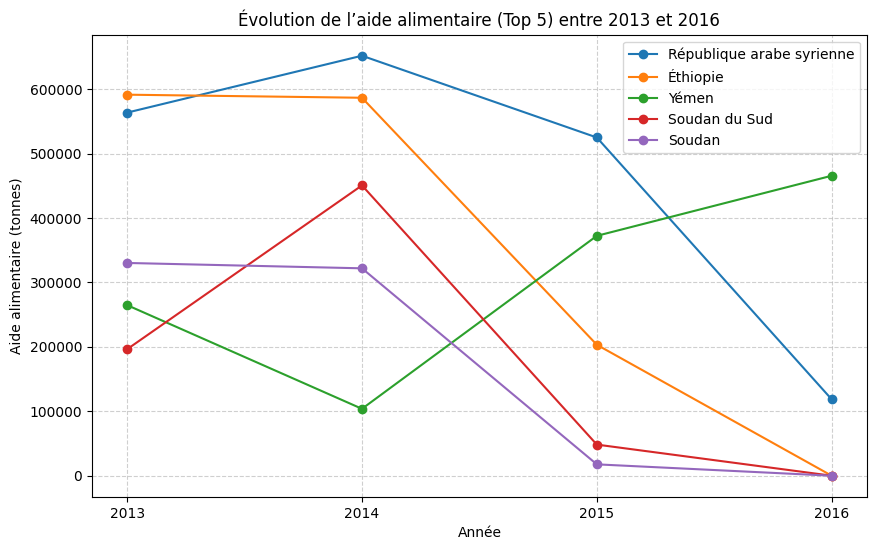

In [140]:
#Affichage des pays avec l’aide alimentaire par année
years = [2013, 2014, 2015, 2016]

# Grille complète (pays du top 5 × 2013-2016)
grid = pd.MultiIndex.from_product([top5_pays_aide, years], names=["Zone","Année"])

aide_top5_full = (
    aide_2013_2016
      .set_index(["Zone","Année"])["Aide alimentaire - Quantité"]
      .reindex(grid, fill_value=0)
      .reset_index()
)

# Re-plot avec séries complètes
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for pays in top5_pays_aide:
    data_p = aide_top5_full[aide_top5_full["Zone"]==pays].sort_values("Année")
    plt.plot(data_p["Année"], data_p["Aide alimentaire - Quantité"], marker="o", label=pays)

plt.title("Évolution de l’aide alimentaire (Top 5) entre 2013 et 2016")
plt.xlabel("Année")
plt.ylabel("Aide alimentaire (tonnes)")
plt.xticks(years)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

👉 5 pays avec la plus faible dispo en kcal/jour :


,Zone,kcal_par_personne_par_jour
127,République centrafricaine,"1,879"
164,Zambie,"1,924"
91,Madagascar,"2,056"
0,Afghanistan,"2,087"
65,Haïti,"2,089"


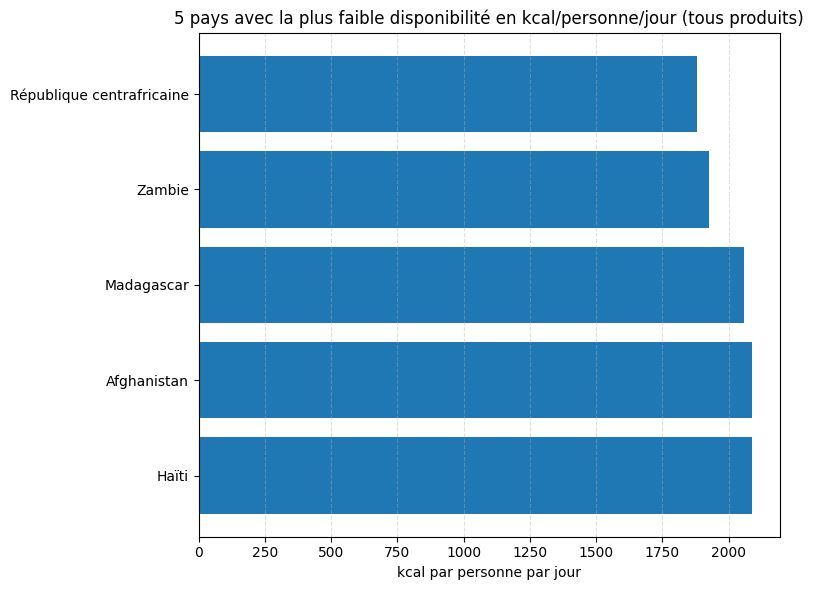

In [141]:
#Calcul de la disponibilité en kcal par personne par jour par pays
# (on somme les contributions de tous les produits)
kcal_par_pays = (
    dispo_pop
      .groupby("Zone", as_index=False)["Disponibilité alimentaire (Kcal/personne/jour)"]
      .sum(min_count=1)
      .rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)": "kcal_par_personne_par_jour"})
)

# Les 5 pays les plus faibles en kcal/personne/jour
bottom5_kcal = kcal_par_pays.sort_values("kcal_par_personne_par_jour", ascending=True).head(5)
print("👉 5 pays avec la plus faible dispo en kcal/jour :")
display(bottom5_kcal)

# Visuel : barres horizontales des 5 pays les plus faibles
to_plot = kcal_par_pays.sort_values("kcal_par_personne_par_jour",
                                    ascending=True).head(5)

plt.figure(figsize=(8, 6))
plt.barh(to_plot["Zone"], to_plot["kcal_par_personne_par_jour"])
plt.xlabel("kcal par personne par jour")
plt.title("5 pays avec la plus faible disponibilité en kcal/personne/jour (tous produits)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


,Zone,kg_par_personne_par_an
0,Tchad,319
1,Zimbabwe,337
2,Zambie,350
3,Afghanistan,351
4,Éthiopie,355
5,Guinée-Bissau,358
6,Bangladesh,365
7,Timor-Leste,369
8,Yémen,375
9,Sénégal,377


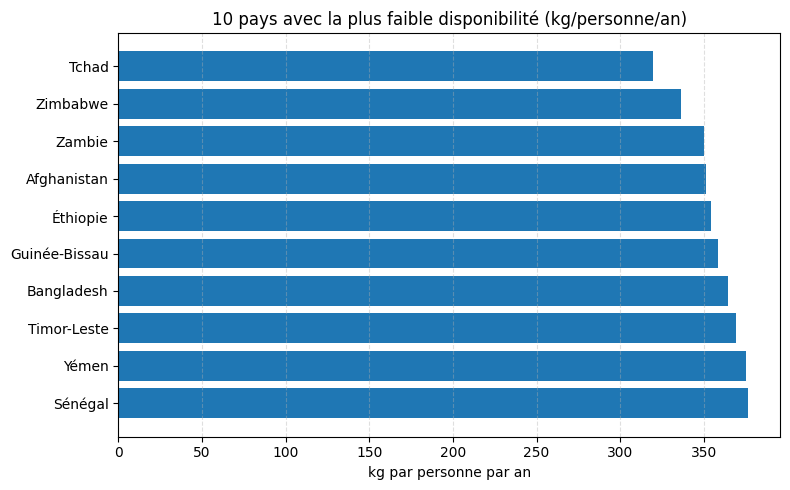

In [142]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
# Calcul de la disponibilité alimentaire en QUANTITÉ (kg/personne/an) par pays
kg_par_pays = (
    dispo_pop
      .groupby("Zone", as_index=False)["Disponibilité alimentaire en quantité (kg/personne/an)"]
      .sum(min_count=1)
      .rename(columns={"Disponibilité alimentaire en quantité (kg/personne/an)":
                       "kg_par_personne_par_an"})
)

# TOP 10 des pays qui ont le MOINS de dispo alimentaire par personne (en kg/an)
pays_moins_dispo = kg_par_pays.sort_values("kg_par_personne_par_an",
                                           ascending=True).head(10).reset_index(drop=True)
display(pays_moins_dispo)

# Visuel : barres horizontales des 10 pays les plus faibles (kg/personne/an)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(pays_moins_dispo["Zone"], pays_moins_dispo["kg_par_personne_par_an"])
plt.xlabel("kg par personne par an")
plt.title("10 pays avec la plus faible disponibilité (kg/personne/an)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

,Zone,kg_par_personne_par_an
0,Monténégro,"1,210"
1,Luxembourg,"1,151"
2,Irlande,"1,150"
3,Albanie,"1,096"
4,Finlande,"1,094"
5,Grèce,"1,071"
6,Pays-Bas,"1,069"
7,Autriche,"1,069"
8,Lituanie,"1,050"
9,Danemark,"1,031"


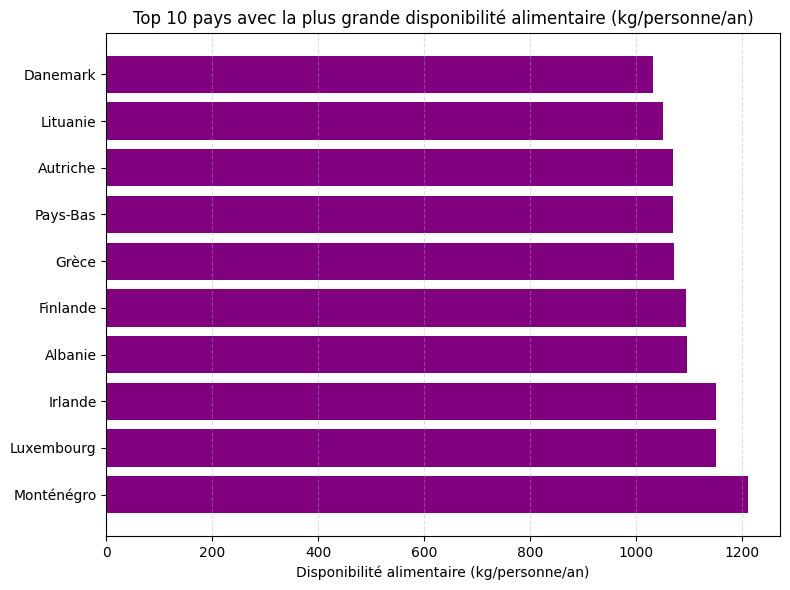

In [143]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
if 'kg_par_pays' not in globals():
    kg_par_pays = (
        dispo_pop
        .groupby("Zone", as_index=False)["Disponibilité alimentaire en quantité (kg/personne/an)"]
        .sum(min_count=1)
        .rename(columns={"Disponibilité alimentaire en quantité (kg/personne/an)":
                         "kg_par_personne_par_an"})
    )

# Top 10 pays avec la plus grande disponibilité (kg/personne/an)
top10_dispo = (
    kg_par_pays
    .sort_values("kg_par_personne_par_an", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

display(top10_dispo)

# Graphique horizontal
to_plot = top10_dispo.sort_values("kg_par_personne_par_an", ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(to_plot["Zone"], to_plot["kg_par_personne_par_an"], color="purple")
plt.xlabel("Disponibilité alimentaire (kg/personne/an)")
plt.title("Top 10 pays avec la plus grande disponibilité alimentaire (kg/personne/an)")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [144]:
#création d'un dataframe avec uniquement la Thaïlande 
thai_manioc = (
    dispo_pop.query("Zone == 'Thaïlande'")
             .loc[lambda d: d["Produit"].str.contains("Manioc", case=False, na=False)]
             .copy()
)

display(thai_manioc[[
    "Zone", "Produit", "Production",
    "Exportations - Quantité",
    "Importations - Quantité",
    "Disponibilité intérieure"
]])



,Zone,Produit,Production,Exportations - Quantité,Importations - Quantité,Disponibilité intérieure
13620,Thaïlande,Manioc,"30,228","25,214","1,250","6,264,000"


In [145]:
# Calcul de la sous nutrition en Thaïlande
sn_thailande = sous_nutrition[sous_nutrition["Zone"] == "Thaïlande"]

# Conversion en millions (valeurs sont en milliers de personnes)
if not sn_thailande.empty:
    valeur_millions = sn_thailande["sous_nutrition"].iloc[-1] / 1000  # dernière période dispo
    print(f"Sous-nutrition en Thaïlande : {valeur_millions:.2f} millions de personnes")
else:
    print("⚠️ Pas de donnée de sous-nutrition pour la Thaïlande.")


Sous-nutrition en Thaïlande : 6.50 millions de personnes


,Zone,Produit,Production,Exportations - Quantité,Proportion exportée (%)
13620,Thaïlande,Manioc,"30,228","25,214",83


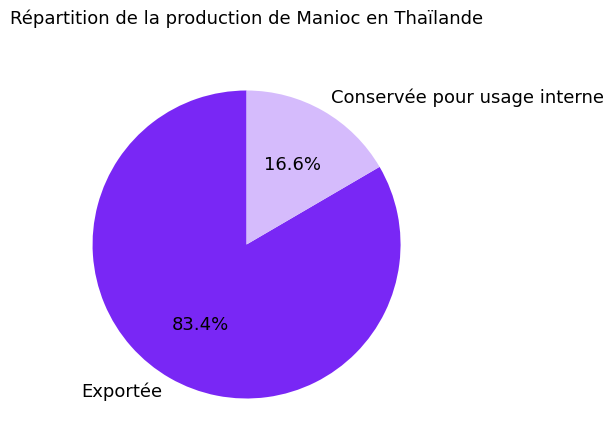

In [146]:
# On calcule la proportion exportée en fonction de la proportion
thai_manioc["Proportion exportée (%)"] = (
    thai_manioc["Exportations - Quantité"] / thai_manioc["Production"] * 100
).round(2)

display(thai_manioc[[
    "Zone", "Produit", "Production",
    "Exportations - Quantité", "Proportion exportée (%)"
]])

# Données
export = thai_manioc["Proportion exportée (%)"].iloc[0]
interne = 100 - export

# Données pour le camembert
labels = ["Exportée", "Conservée pour usage interne"]
values = [export, interne]
colors = ["#7927F5", "#D5BBFC"]

# Graphique cammenbert
plt.figure(figsize=(5,5))
plt.pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize': 13}
)
plt.title("Répartition de la production de Manioc en Thaïlande", fontsize=13, pad=20)
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [147]:
#ajouter en dessous toutes les analyses complémtaires